In [1]:
# Always: Numpy and Plt
import numpy as np
import matplotlib.pyplot as plt

# OLS
import statsmodels.api as sm

# Itertools
import itertools

# speed check
from tqdm import tqdm

# Our helper functions
import sys
sys.path.append("..")
import helper.helper as h
import helper.methods as m

[[ 0.    0.    0.   -0.27  0.    0.38]
 [ 0.    0.73  0.   -0.46  0.    0.27]
 [ 0.   -0.65  0.    0.   -0.69  0.43]
 [ 0.    0.    0.    0.33  0.    0.  ]
 [ 0.    0.65 -0.55 -0.67  0.    0.  ]
 [ 0.   -0.63  0.    0.63  0.    0.59]]
All edges are between +- 0.25 - 0.50. Not all diagonal entries are positive. The generating W is no DAG.


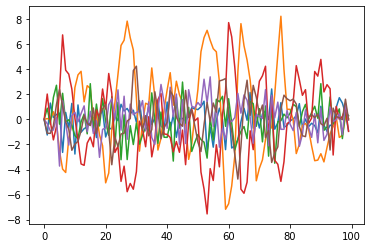

In [2]:
# Get data name
data_name = "X_s15_n6_T100_random_matrix_0"

# Load data
W_true, X, expl = h.load_data(data_name)

# Plot data
plt.plot(X)

# Show true matrix W
print(np.round(W_true, 2))

# Show explanation
print(expl)

# Useful variables
T, n = np.shape(X)

In [3]:
def ols_W(X, P):
    # translate X
    x = X @ P.T
    
    # get regressor and varibles
    y = x[1:]
    x = x[:-1]

    W_hat = np.array(np.zeros(n)).T

    # get parameters
    for i in range(n):
        est = sm.OLS(y[:, i], x[:, i:]).fit()   
        W_hat = np.vstack((W_hat, np.append(np.zeros(i), est.params).T))

    return P.T @ W_hat[1:].T @ P

def loss(W):
    M = X @ W
    
    # Remove X[0] and XW[last]
    R = X[1:] - M[:-1]
    
    # Frobenius norm squared loss
    loss = 1 / X[1:].shape[0] * (R ** 2).sum()
    
    return loss

def get_likelihood(P):    
    # Get using least squares
    W = ols_W(X, P)
    
    # get loss    
    return loss(W), W

In [ ]:
import timeit

timeit.timeit('get_likelihood(np.identity(n))', globals = globals())

In [ ]:
perms = itertools.permutations(np.identity(n))
total = np.math.factorial(n)

P_best = np.identity(n)
L_best, W_best = get_likelihood(np.identity(n))

for perm in tqdm(perms, total = total):
    perm = np.array(perm)
    L, W = get_likelihood(perm)

    if L < L_best:
        P_best, W_best, L_best = perm, W, L

print(f"Exhaustively best P:\n{P_best},\n\nExhaustively best W:\n{np.round(W_best, 2)},\n\nLikelihood: {round(L_best, 2)}.")

In [ ]:
h.score(X, W_best, W_true, rounding = 5);

In [ ]:
def ols_W2(X, P):
    # translate X
    x = X @ P.T
    
    X_regress = np.kron(np.eye(n, dtype=float), x[:-1]) # @ W.T.reshape(n ** 2)

    # remove last column of second block
    for i in range(1, n):
        X_regress[:, i * n + 0: i * n + i] = np.zeros((n * (T - 1), i))

    y_regress = x[1:].T.reshape((T - 1) * n) 

    ols = sm.OLS(y_regress, X_regress).fit()     

    return P.T @ ols.params.reshape(n, n).T @ P


In [ ]:
def ols_W4(X, p):
    # translate X
    x = X[:, p]
    
    # get regressor and varibles
    y = x[1:]
    x = x[:-1]

    W_hat = np.array(np.zeros(n)).T

    # get parameters
    for i in range(n):
        est = sm.OLS(y[:, i], x[:, i:]).fit()   
        W_hat = np.vstack((W_hat, np.append(np.zeros(i), est.params).T))

    W = W_hat[1:].T
    W = W[:, p][p, :]
    
    return W

In [ ]:
def ols_W3(X, p):
    # translate X
    x = X[:, p]
    
    X_regress = np.kron(np.eye(n, dtype=float), x[:-1])

    # remove last column of second block
    for i in range(1, n):
        X_regress[:, i * n + 0: i * n + i] = np.zeros((n * (T - 1), i))

    y_regress = x[1:].T.reshape((T - 1) * n) 
    ols = sm.OLS(y_regress, X_regress).fit()     
    W = ols.params.reshape(n, n).T[:, p]
    
    return W[p, :]


In [ ]:
ols_W2(X, np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]]))

In [ ]:
T, n = np.shape(X)
X_regress = np.kron(np.eye(n, dtype=float), X[:-1]) # @ W.T.reshape(n ** 2)

# remove last column of second block
for i in range(1, n):
    X_regress[:, i * n + 0: i * n + i] = np.zeros((n * (T - 1), i))
    
y_regress = X[1:].T.reshape((T - 1) * n) 

ols = sm.OLS(y_regress, X_regress).fit()   
print(ols.params.reshape(n, n).T)
print(W)

In [ ]:
W = np.arange(9).reshape(n, n)
W = W[:, permutation]
W[permutation, :]

In [ ]:
permutation = [2, 1, 0]
X[:, permutation]

In [ ]:
print(n, T)
a = np.array([[10, 20, 30, 40, 50],
...               [ 6,  7,  8,  9, 10]])
>>> permutation = [0, 4, 1, 3, 2]
>>> idx = np.empty_like(permutation)
>>> idx[permutation] = np.arange(len(permutation))
>>> a[:, idx]  # return a rearranged copy
array([[10, 30, 50, 40, 20],
       [ 6,  8, 10,  9,  7]])
a[:] = a[:, idx]  # in-place modification of a